# Соединение датасета. Проверка на пропуски и выбросы

In [1]:
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd

models_path = 'C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish/'

In [2]:
X_bp = pd.read_excel ('C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish/X_bp.xlsx') 

In [3]:
X_bp.shape

(1023, 11)

In [4]:
X_nup = pd.read_excel ('C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish/X_nup.xlsx')
X_nup.shape

(1040, 4)

In [5]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0                             Unnamed: 0
1        Соотношение матрица-наполнитель
2                       Плотность, кг/м3
3                  модуль упругости, ГПа
4            Количество отвердителя, м.%
5        Содержание эпоксидных групп,%_2
6               Температура вспышки, С_2
7          Поверхностная плотность, г/м2
8   Модуль упругости при растяжении, ГПа
9          Прочность при растяжении, МПа
10               Потребление смолы, г/м2

In [6]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0          Unnamed: 0
1  Угол нашивки, град
2         Шаг нашивки
3   Плотность нашивки

In [7]:
df = X_bp.join(X_nup, on=None, how='inner', lsuffix='1', rsuffix='2', sort=False) 

In [8]:
df.shape

(1023, 15)

In [9]:
pd.DataFrame(df.columns, columns=['DF признаки'])

DF признаки
0                            Unnamed: 01
1        Соотношение матрица-наполнитель
2                       Плотность, кг/м3
3                  модуль упругости, ГПа
4            Количество отвердителя, м.%
5        Содержание эпоксидных групп,%_2
6               Температура вспышки, С_2
7          Поверхностная плотность, г/м2
8   Модуль упругости при растяжении, ГПа
9          Прочность при растяжении, МПа
10               Потребление смолы, г/м2
11                           Unnamed: 02
12                    Угол нашивки, град
13                           Шаг нашивки
14                     Плотность нашивки

In [10]:
df = df.drop(columns = ['Unnamed: 01','Unnamed: 02' ], axis = 1) #Удаляем ненужные колонки

In [11]:
df.shape

(1023, 13)

In [12]:
df.isnull().sum() # Проверяем датасет на пропуски

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [13]:
# типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [14]:
# описательная статистика
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

In [15]:
# Исходя из отсутствия пропусков делаем вывод о том, что датасет предварительно подготовлен, поэтому нам следует лишь 
# проверить его на вбросы

# для этого нам необходимо:
# 1. Подгрузить необходимые библиотеки;
# 2. Построить гистрограмму + квартилии ящика с усами/скрипичная диаграмма
# 3. Проверить на соответствие признаков нормальному распределению Гаусса
# 4. Проверить вбросы
# 5. Проверим корреляцию признаков


In [16]:
# Загружаем необходимые библиотеки, возможно что-то понадобится дополнительно
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle


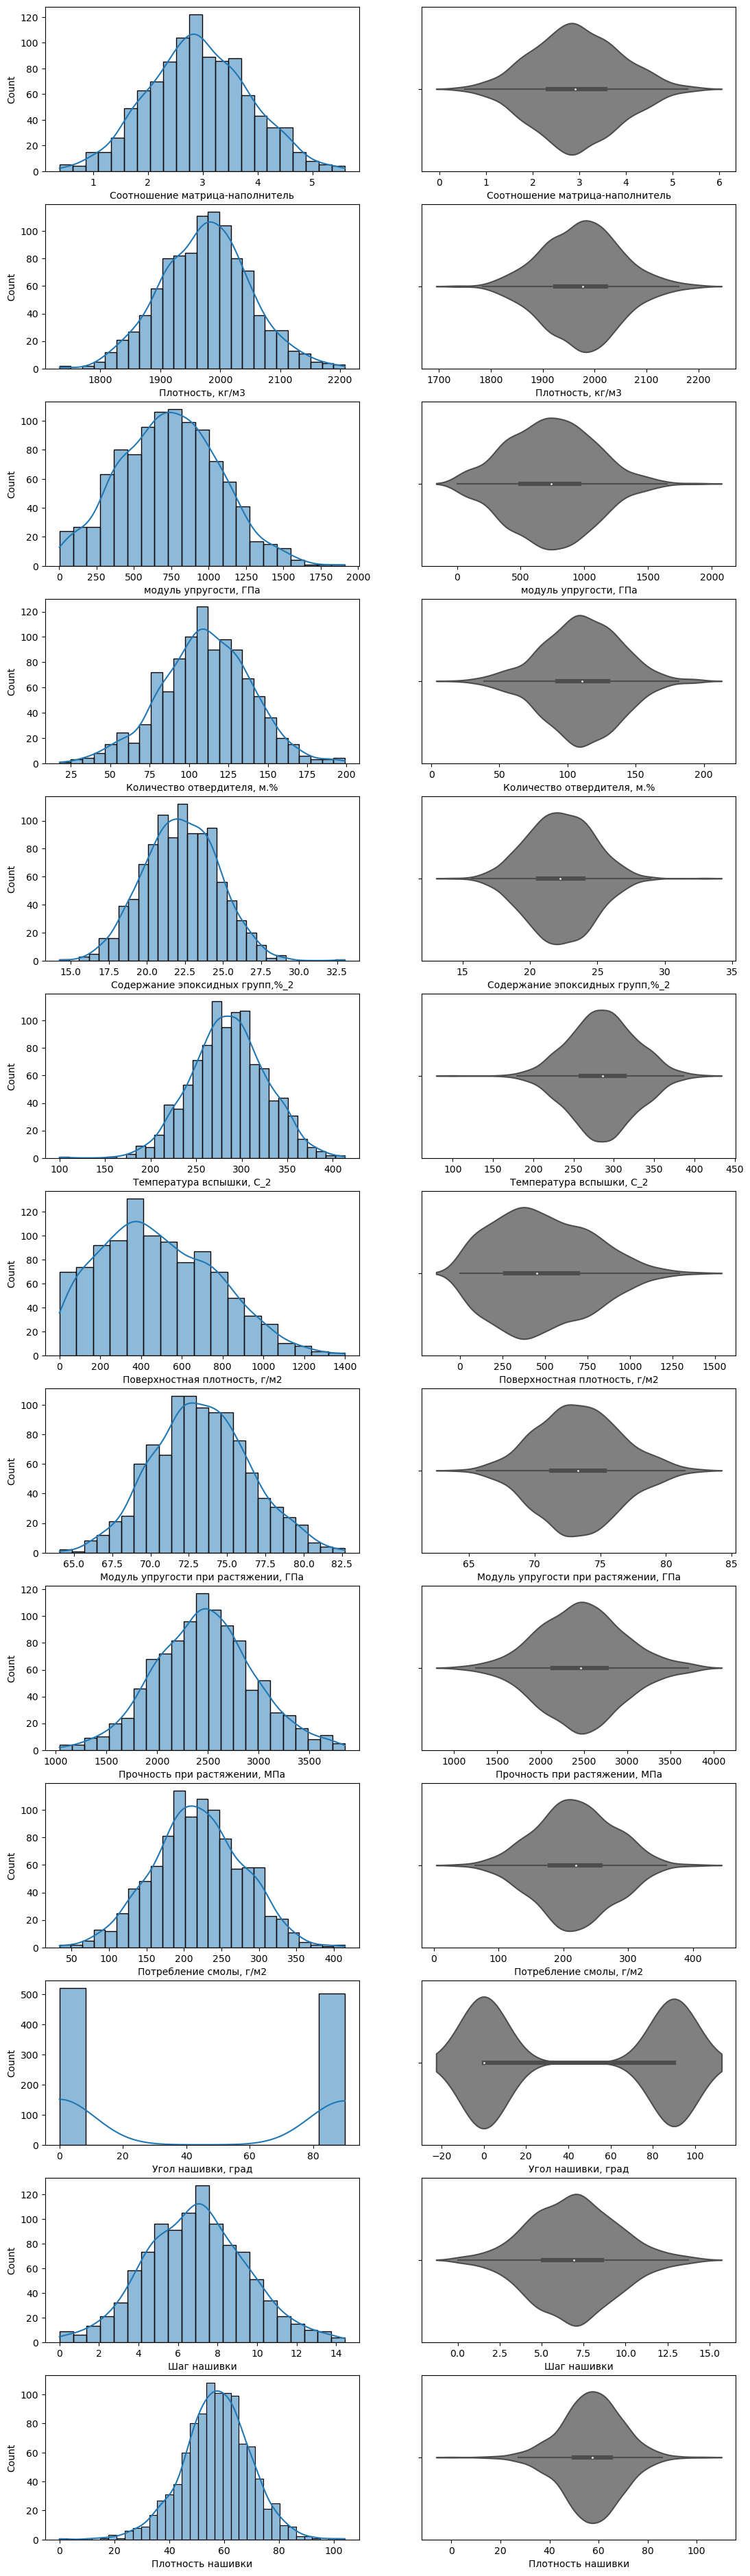

In [17]:
# Строим гистрограмму + скрипичная диаграмма
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.violinplot(data=df, x=column, ax=axes[k, 1], color='grey')
plt.show()

In [18]:
# Все признаки за исключением признака "Угол нашивки" принимают 1 значение - положительное, остальные признаки 
# соответствуют нормальному распределению Гаусса Лапласа. violinplot отлично визуализирует медианные значения

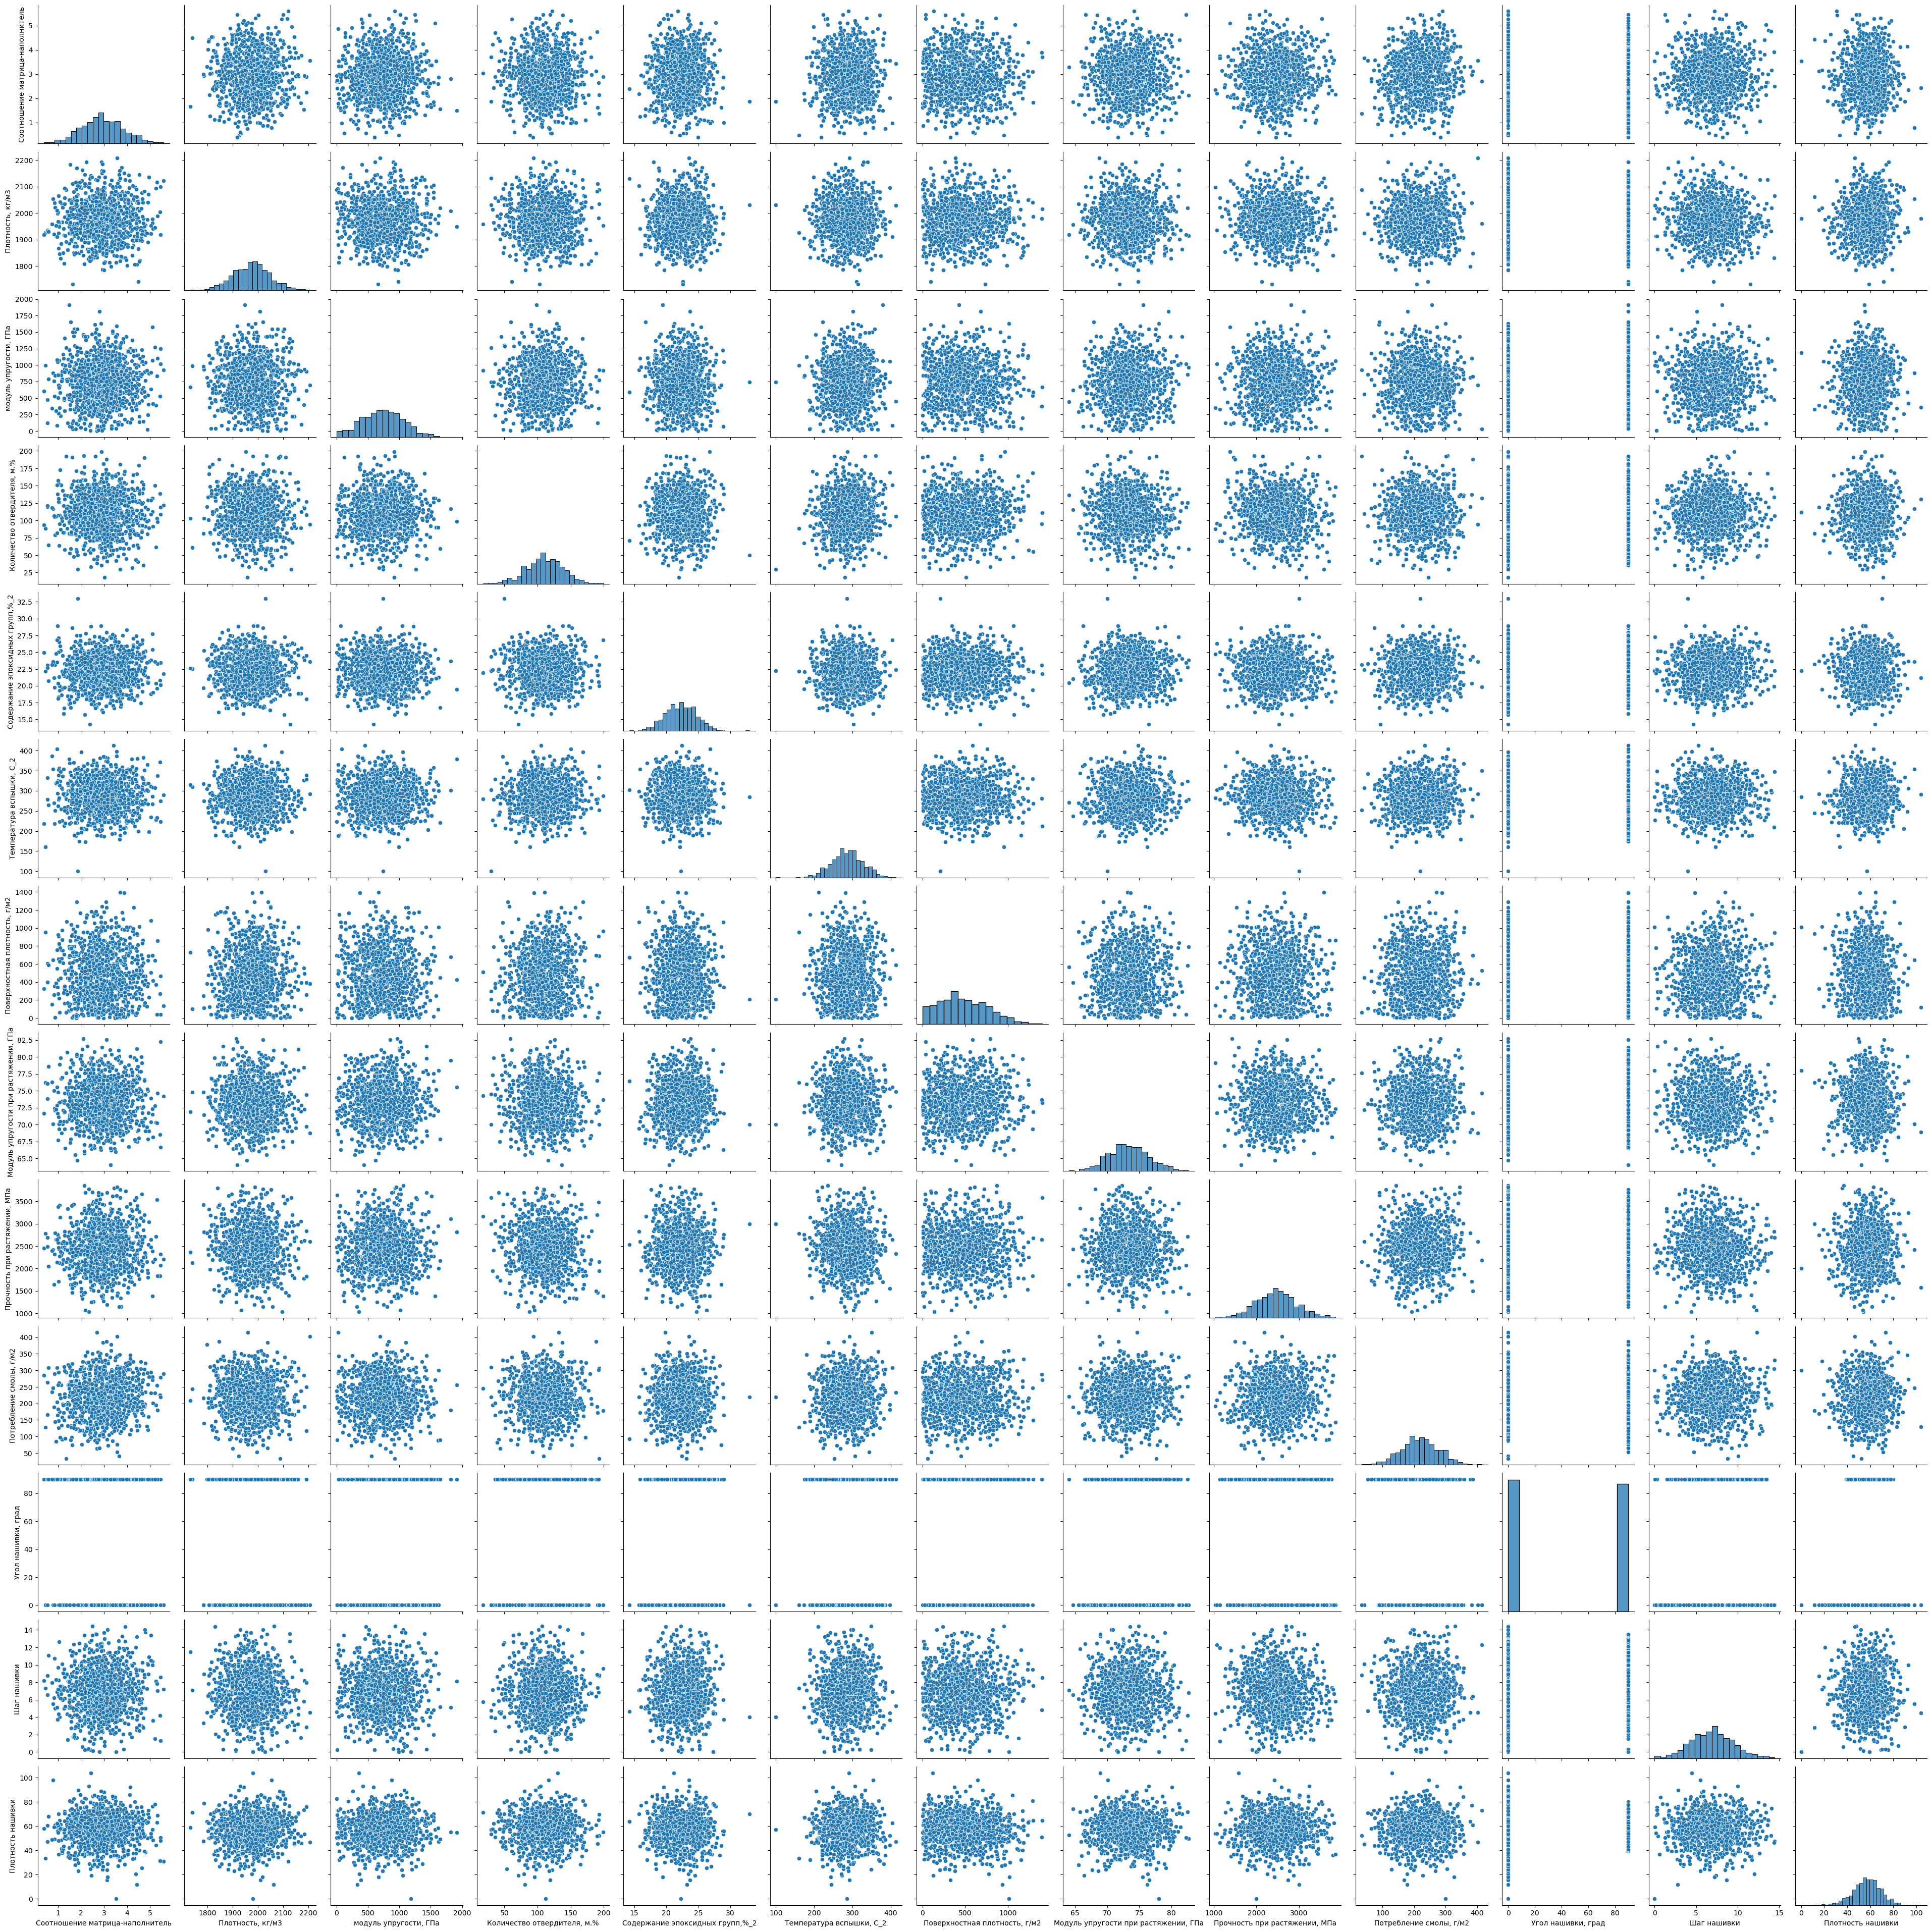

In [19]:
# Построим попарные графики рассеивания 
sns.pairplot(df, height=3);

Соотношение матрица-наполнитель: 3s=0 iq=6


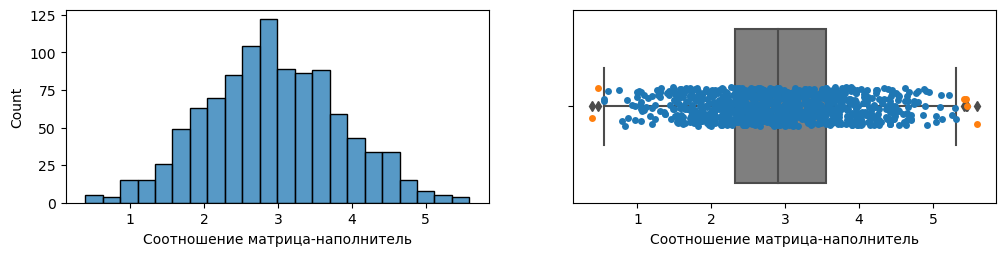

Метод 3-х сигм, выбросов: 0
Плотность, кг/м3: 3s=3 iq=9


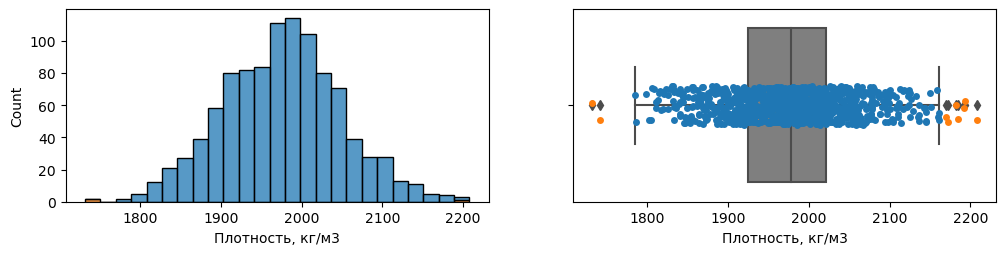

Метод 3-х сигм, выбросов: 3
модуль упругости, ГПа: 3s=2 iq=2


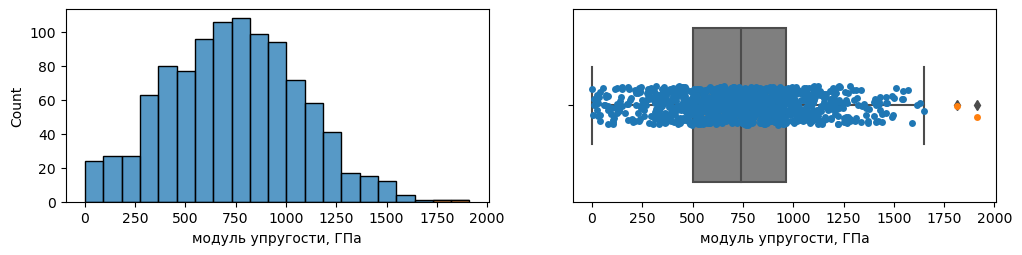

Метод 3-х сигм, выбросов: 5
Количество отвердителя, м.%: 3s=2 iq=14


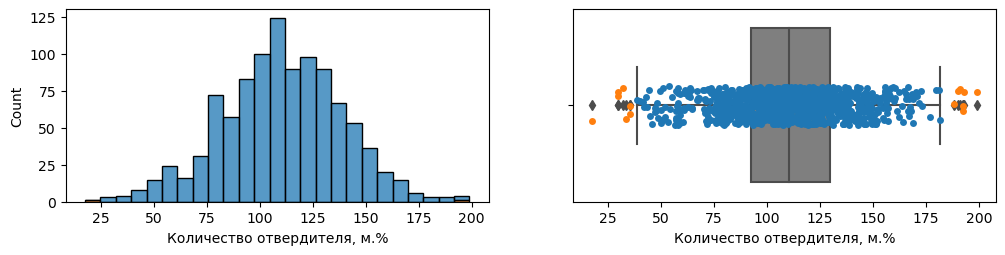

Метод 3-х сигм, выбросов: 7
Содержание эпоксидных групп,%_2: 3s=2 iq=2


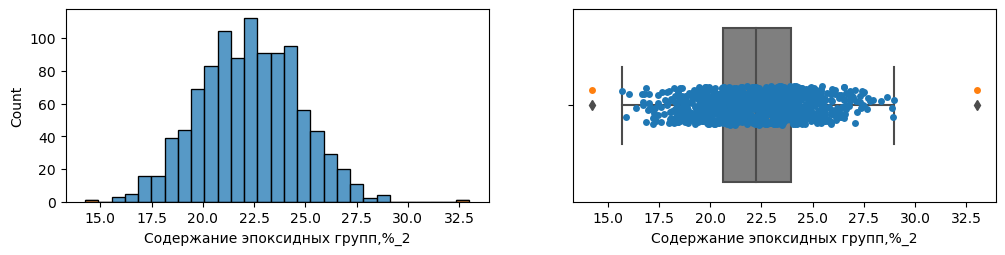

Метод 3-х сигм, выбросов: 9
Температура вспышки, С_2: 3s=3 iq=8


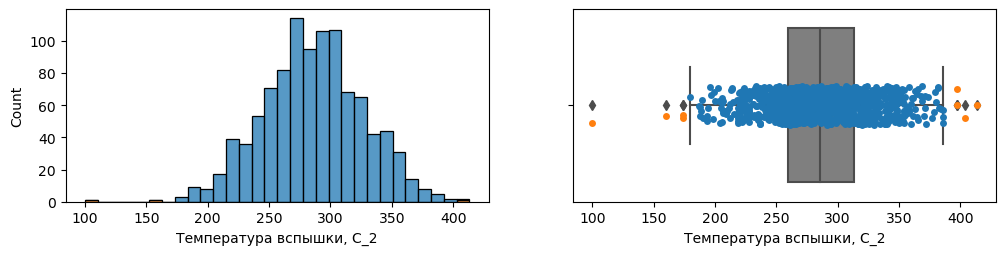

Метод 3-х сигм, выбросов: 12
Поверхностная плотность, г/м2: 3s=2 iq=2


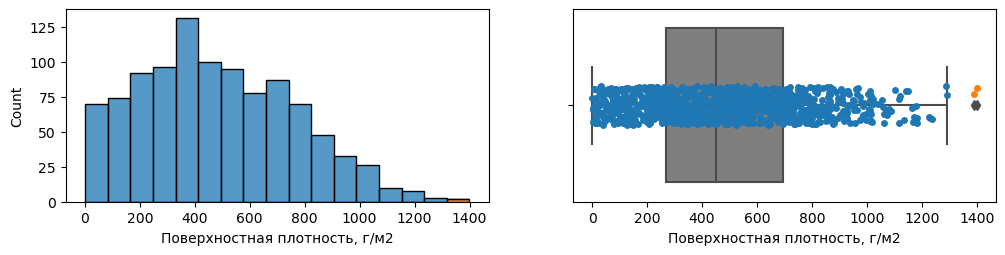

Метод 3-х сигм, выбросов: 14
Модуль упругости при растяжении, ГПа: 3s=0 iq=6


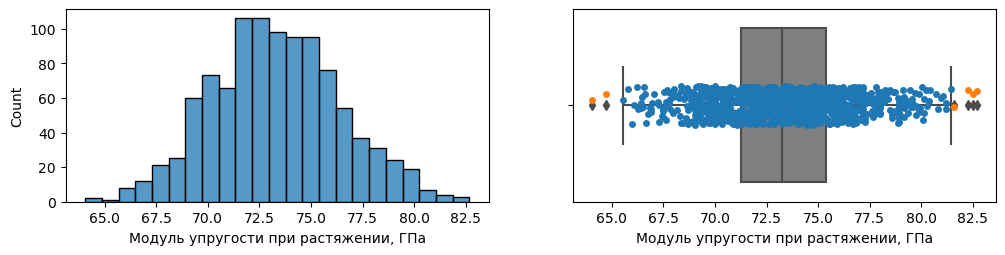

Метод 3-х сигм, выбросов: 14
Прочность при растяжении, МПа: 3s=0 iq=11


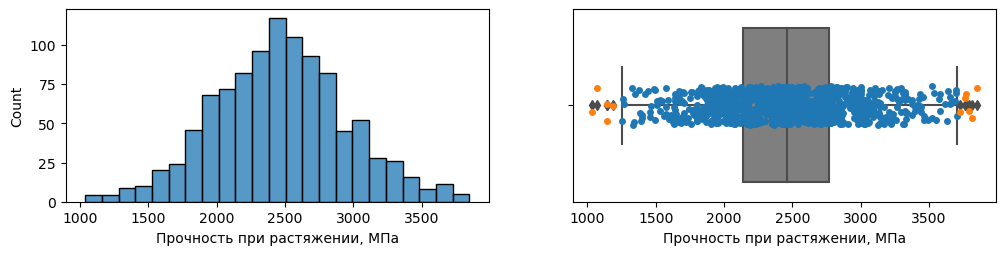

Метод 3-х сигм, выбросов: 14
Потребление смолы, г/м2: 3s=3 iq=8


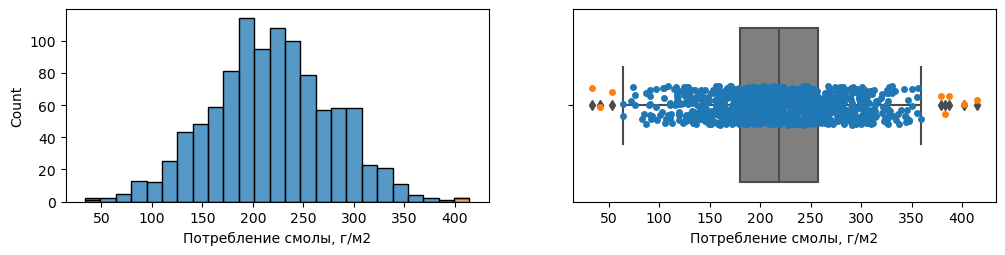

Метод 3-х сигм, выбросов: 17
Угол нашивки, град: 3s=0 iq=0


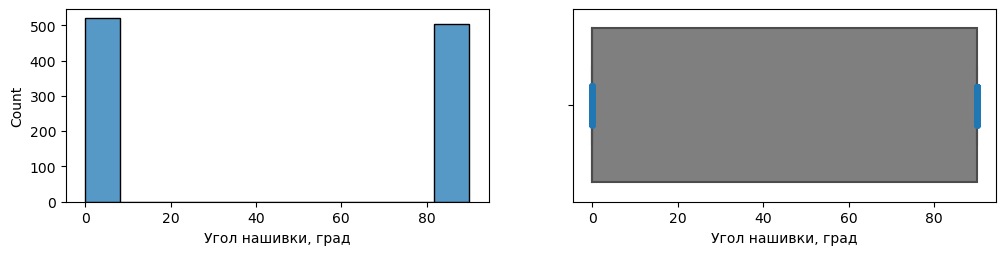

Метод 3-х сигм, выбросов: 17
Шаг нашивки: 3s=0 iq=4


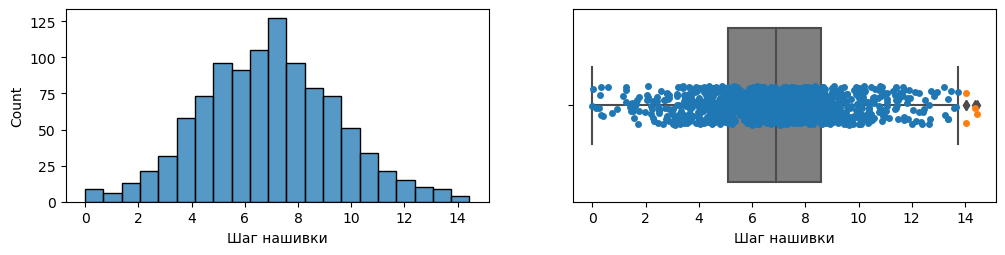

Метод 3-х сигм, выбросов: 17
Плотность нашивки: 3s=7 iq=21


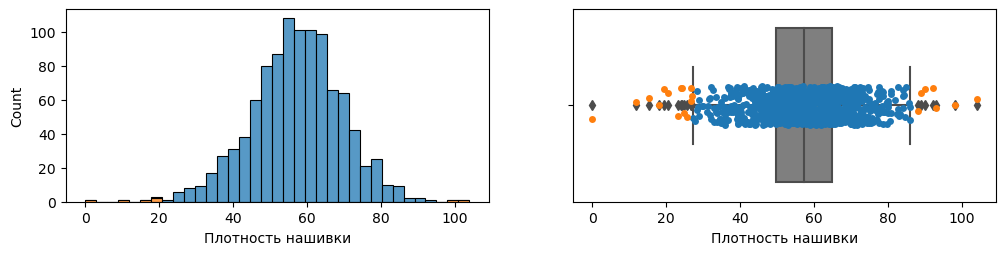

Метод 3-х сигм, выбросов: 24
Метод среднего значения и отклонений, выбросов: 93


In [20]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом среднего значения и оклонений
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()
    
    print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод среднего значения и отклонений, выбросов:', count_iq)

In [21]:
# Как мы видим, количество выбросов методом среднего значения и оклонений - 93, что в 4 раза больше по отношению к 
# метододу "3-х сигм". Остановимся на нём, чтобы потерять меньше данных. Удалим выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

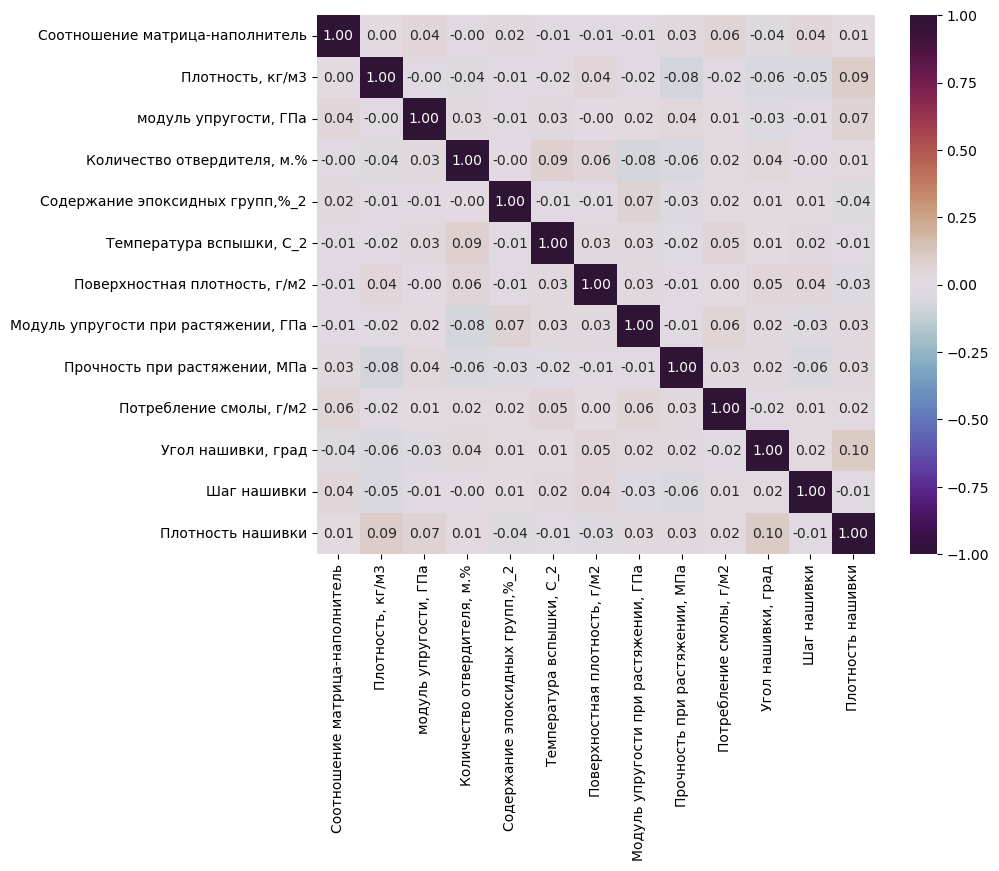

In [22]:
# Теперь построим матрицу корреляции
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

# Предобработка данных


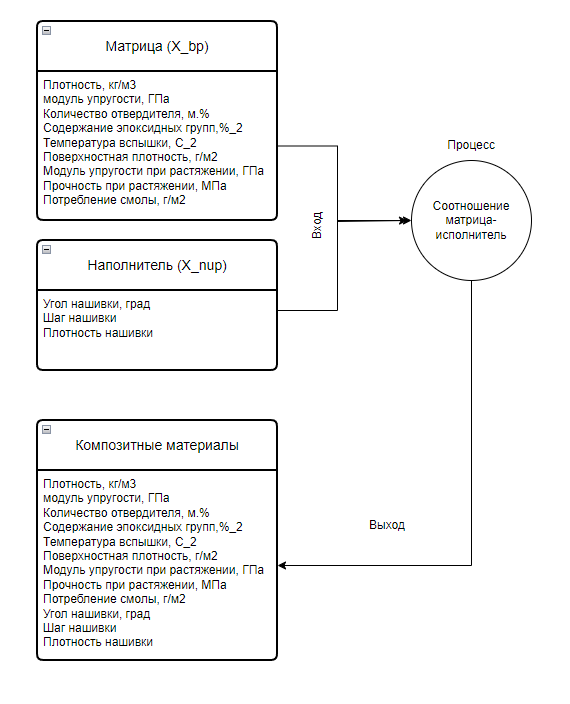

In [23]:
from IPython.display import Image
Image('C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish/Снимок.png')

In [24]:
# Признаки для модуля упругости при растяжении
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]


In [25]:
# Признаки для прочности при растяжении
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [26]:
# Признаки для соотношения матрица-наполнитель
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   int64  
 11  Шаг нашивки      

In [28]:
# Разделяем переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

# Препроцессор для модуля упругости при растяжении
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

# Препроцессор для прочности при растяжении
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

# Препроцессор для соотношения матрица-наполнитель
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [29]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

In [30]:
# Определим RANDOM_STATE для повторяемости результатов и приступим к выбору модели
RANDOM_STATE = 4096

# Выбор модели

In [31]:
#Для сравнения моделей использем метрики R2, RMSE, MAE, MAPE. Для статистической устойчивости результатов используем кросс-валидацию. 
#Оформляем запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

In [32]:
#Для поиска параметров по сетке тоже вспомогательная функция
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

In [33]:
#И еще одна вспомогательная функция для получения метрик предсказания.
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

# Модель для модуля упругости при растяжении, ГПа

In [34]:
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [35]:
# Препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [36]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [37]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [38]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

In [39]:
# Сравнение моделей с параметрами по умолчанию. Чтобы определить нижнюю границу качества модели, использую базовую модель,
# возвращающую среднее значение целевого признака. Для этого используем DummyRegressor из sklearn.
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

In [40]:
# Приступаем к поиску лучших моделей
s_models1 = {}
# Подбор для модели Ridge
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
899  {'alpha': 1500, 'positive': True, 'solver': 'lbfgs'} -2.616392     1

In [41]:
# для модели линейной регрессии Lasso

params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params      MAE  rank
8  {'alpha': 0.5} -2.61513     1
9    {'alpha': 1} -2.61513     1

In [42]:
# Попробую подобрать параметры для модели регрессия опорных векторов (SVR)

params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
6  {'C': 0.001, 'kernel': 'poly'} -2.615569     1

In [43]:
# для k-ближайших соседей 

params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
10  {'n_neighbors': 23} -2.638854     1

In [44]:
# для модели Деревья решений

params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
127  {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 4, 'random_state': 4096, 'splitter': 'random'}   
129  {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 5, 'random_state': 4096, 'splitter': 'random'}   

          MAE  rank  
127 -2.612219     1  
129 -2.612219     1

In [45]:
# для модели алгоритма случайного леса (RF)

params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

params  \
2  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 2, 'n_estimators': 50, 'random_state': 4096}   

        MAE  rank  
2 -2.644719    10

In [46]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

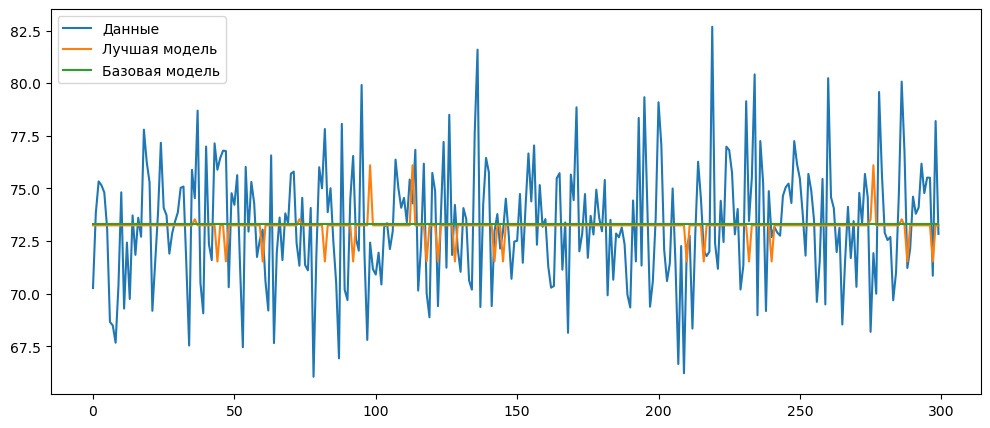

In [47]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [48]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1


C:\Users\lawye\AppData\Local\Temp\ipykernel_17376\2263067557.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.000016 -2.813038 -2.221060 -0.030326   
Лучшая модель (дерево решений) -0.033680 -2.859995 -2.265207 -0.030879   

                                max_error  
Базовая модель                  -9.367223  
Лучшая модель (дерево решений)  -9.434457

# Модель для прочности при растяжении, МПа

In [49]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [50]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [51]:
# Сравнение моделей с параметрами по умолчанию. Проходим аналогичную процедуру по выбранным моделям
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

In [52]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [53]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [54]:
# Приступаем к поиску лучших моделей для прочности при растяжении
s_models2 = {}

In [55]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
791  {'alpha': 990, 'positive': True, 'solver': 'lbfgs'} -394.202197     1

In [56]:
# для модели линейной регрессии Lasso

params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
6   {'alpha': 40} -393.601038     1
7   {'alpha': 50} -393.601038     1
8   {'alpha': 60} -393.601038     1
9  {'alpha': 100} -393.601038     1

In [57]:
# для модели регрессия опорных векторов (SVR)
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]


params         MAE  rank
3  {'C': 0.001, 'kernel': 'poly'} -393.918641     1

In [58]:
# для модели Деревья решений
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
224  {'criterion': 'poisson', 'max_depth': 3, 'max_features': 3, 'random_state': 4096, 'splitter': 'best'}   

            MAE  rank  
224 -389.529097     1

In [59]:
# для модели Градиентный бустинг
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
12  {'loss': 'squared_error', 'max_depth': 2, 'max_features': 1, 'n_estimators': 50, 'random_state': 4096}   

           MAE  rank  
12 -393.624265     1

In [60]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

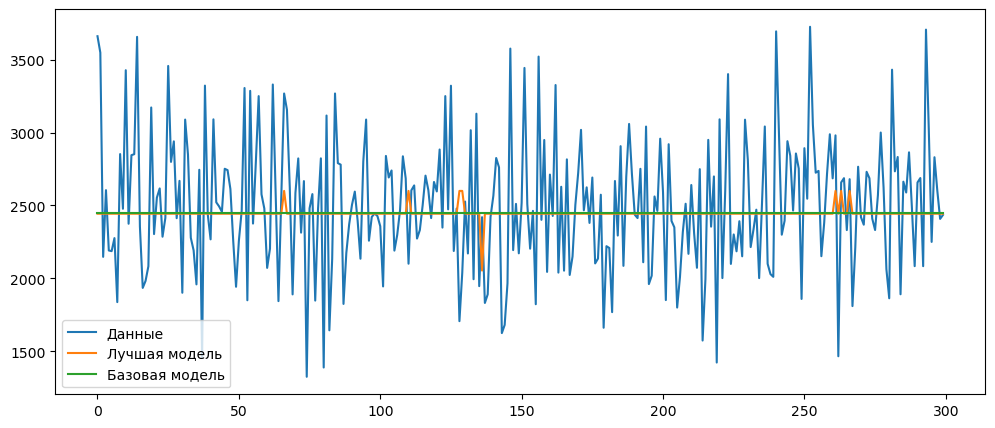

In [61]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)
[230]
# Предсказание лучшей модели
#best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)
[231]
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [62]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (Деревья решений)', y2_test, y2_pred_best))
compare2

C:\Users\lawye\AppData\Local\Temp\ipykernel_17376\1622527546.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (Деревья решений)', y2_test, y2_pred_best))


R2        RMSE         MAE      MAPE  \
Базовая модель                  -0.013996 -457.234840 -356.545181 -0.147661   
Лучшая модель (Деревья решений) -0.020139 -458.617808 -357.596120 -0.148075   

                                   max_error  
Базовая модель                  -1276.441894  
Лучшая модель (Деревья решений) -1281.707872

# Модель для соотношения матрица-наполнитель

In [63]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [64]:
# препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)
[28]
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [65]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [66]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [67]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

In [68]:
# Импортируем MLPRegressor из sklearn
from sklearn.neural_network import MLPRegressor

In [69]:
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [70]:
%%time
# Стартуем
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 5.24321932
Validation score: -10.723341
Iteration 2, loss = 4.83113955
Validation score: -9.789600
Iteration 3, loss = 4.46730090
Validation score: -9.135954
Iteration 4, loss = 4.21022920
Validation score: -8.537115
Iteration 5, loss = 3.93686109
Validation score: -7.750860
Iteration 6, loss = 3.56603540
Validation score: -6.664559
Iteration 7, loss = 3.06562413
Validation score: -5.248405
Iteration 8, loss = 2.42178117
Validation score: -3.581812
Iteration 9, loss = 1.70346985
Validation score: -1.918815
Iteration 10, loss = 1.06559183
Validation score: -0.752229
Iteration 11, loss = 0.70257858
Validation score: -0.632475
Iteration 12, loss = 0.78031371
Validation score: -1.025963
Iteration 13, loss = 0.89285531
Validation score: -0.838852
Iteration 14, loss = 0.74057015
Validation score: -0.485907
Iteration 15, loss = 0.59580568
Validation score: -0.397793
Iteration 16, loss = 0.56876853
Validation score: -0.472088
Iteration 17, loss = 0.59397262
Validation score

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=4096, validation_fraction=0.3, verbose=True)

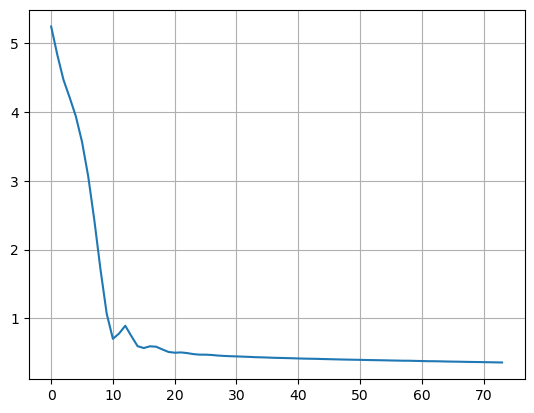

In [71]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [72]:
# Предсказание НС
y3_pred_skl = model3_1.predict(x3_test)

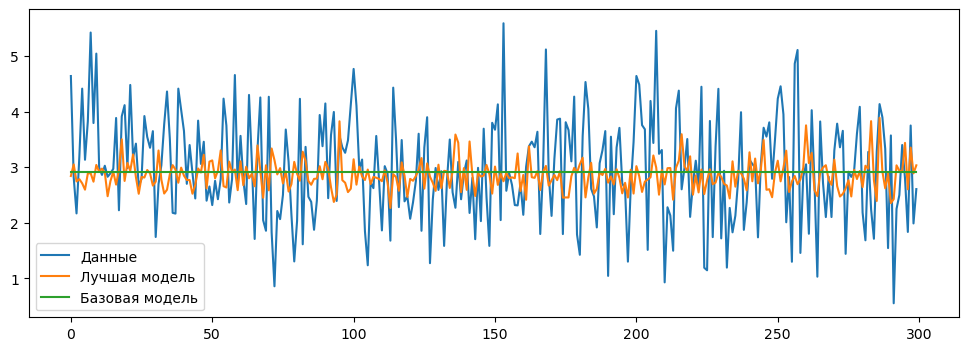

In [73]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [74]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base) #для оценки качества модели
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

C:\Users\lawye\AppData\Local\Temp\ipykernel_17376\2130300550.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.003309 -0.935162 -0.757702 -0.317726  -2.671554
MLPRegressor   -0.047629 -0.955594 -0.774743 -0.312176  -2.843771

In [75]:
# Функция, собирающая НС заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [76]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [77]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [78]:
# Собираю НС
model3_2 = construct_model()


In [79]:
# Компилирую НС
model3_2 = compile_model(model3_2)

In [80]:
# Сводная информация по архитектуре НС
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)                6

In [81]:
%%time
#Обучение НС
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 14ms/step - loss: 92.5615 - root_mean_squared_error: 2.8989 - val_loss: 79.3050 - val_root_mean_squared_error: 2.5366
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 59.7581 - root_mean_squared_error: 2.0271 - val_loss: 42.1876 - val_root_mean_squared_error: 1.3271
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 40.6468 - root_mean_squared_error: 1.3126 - val_loss: 39.1733 - val_root_mean_squared_error: 1.3119
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 35.7633 - root_mean_squared_error: 1.2627 - val_loss: 35.8167 - val_root_mean_squared_error: 1.1514
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 33.0681 - root_mean_squared_error: 1.1622 - val_loss: 35.0377 - val_root_mean_squared_error: 1.1531
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 32.0337 - root_mean_squared_error: 1.1208 - val_loss: 34.3027 - val

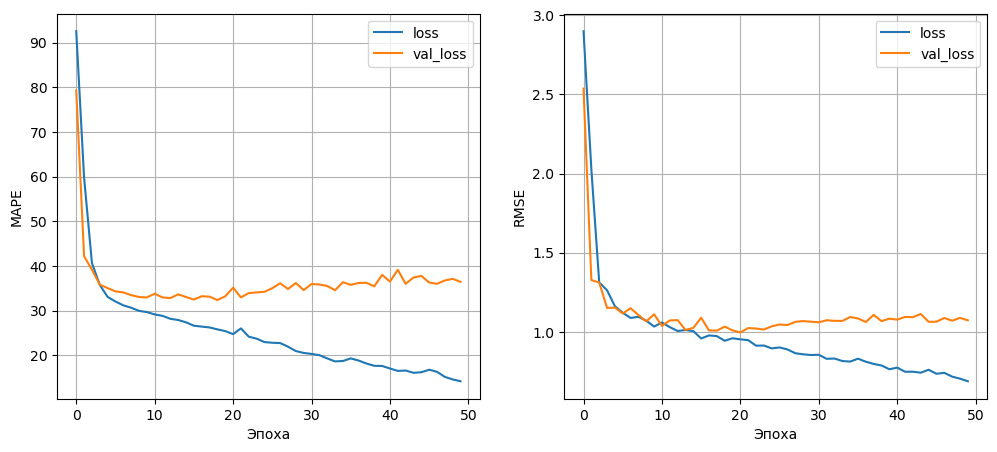

In [82]:
plot_loss(history.history)

In [83]:
# Проверяем точность НС на тестовых данных
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 1000us/step - loss: 36.3174 - root_mean_squared_error: 1.1369


[36.31737518310547, 1.1368625164031982]

In [84]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 889us/step


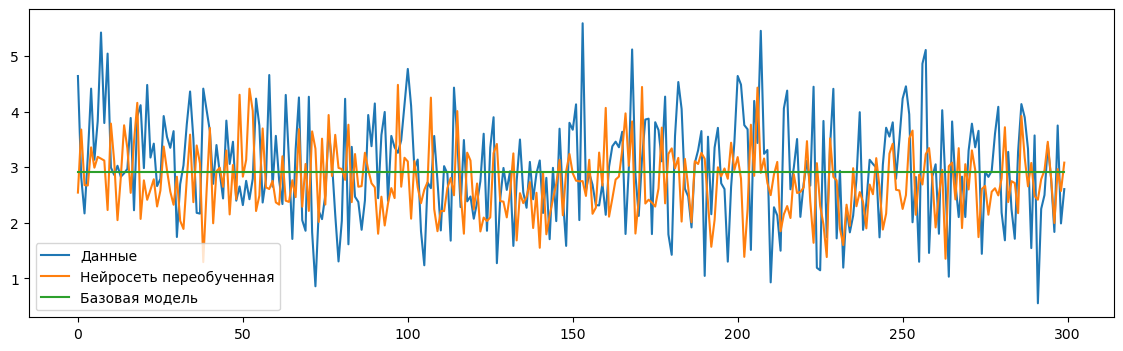

In [85]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [86]:
'''Попробуем раннюю остановку процесса обучения для борьбы с переобучением'''
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [87]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 89.8348 - root_mean_squared_error: 2.8275 - val_loss: 73.6063 - val_root_mean_squared_error: 2.3971
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 53.4280 - root_mean_squared_error: 1.8801 - val_loss: 42.3954 - val_root_mean_squared_error: 1.2704
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 37.0029 - root_mean_squared_error: 1.1655 - val_loss: 37.7817 - val_root_mean_squared_error: 1.2662
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 33.2824 - root_mean_squared_error: 1.1698 - val_loss: 38.5137 - val_root_mean_squared_error: 1.1709
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 31.8616 - root_mean_squared_error: 1.0780 - val_loss: 36.4567 - val_root_mean_squared_error: 1.1637
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 30.4187 - root_mean_squared_error: 1.0513 - val_loss: 36.2161 - val

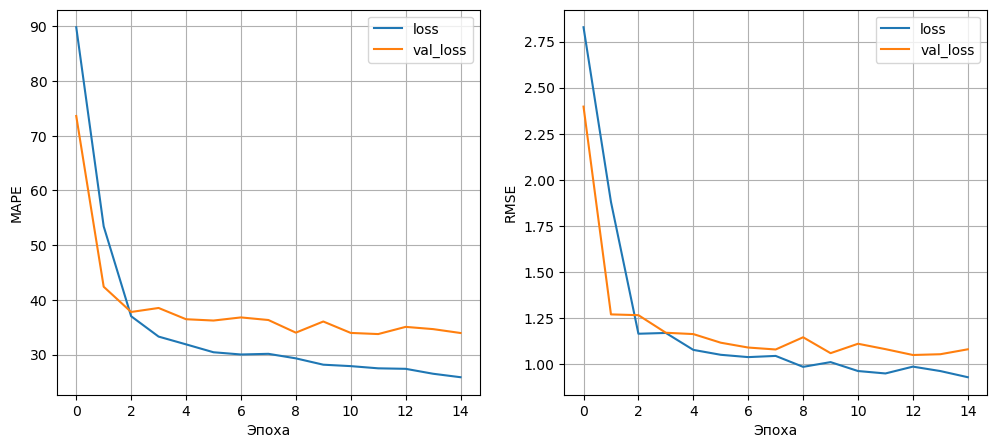

In [88]:
plot_loss(history.history)

In [89]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 1ms/step - loss: 31.2400 - root_mean_squared_error: 1.1025


[31.240007400512695, 1.1025210618972778]

In [90]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 1000us/step


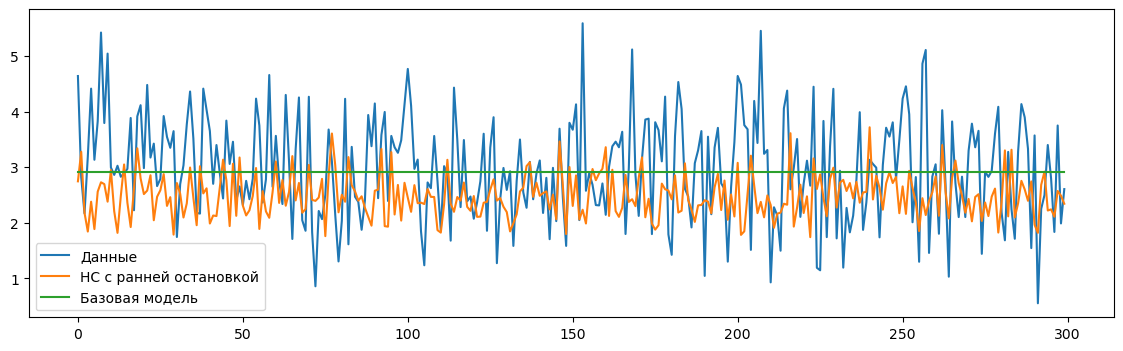

In [91]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='НС с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [92]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [93]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [94]:
# Архитектура 
model3_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [95]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 2s 13ms/step - loss: 100.0704 - root_mean_squared_error: 3.0699 - val_loss: 96.5353 - val_root_mean_squared_error: 2.9366
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 93.5857 - root_mean_squared_error: 2.9110 - val_loss: 86.1372 - val_root_mean_squared_error: 2.6896
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 71.8294 - root_mean_squared_error: 2.4030 - val_loss: 43.9998 - val_root_mean_squared_error: 1.6006
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 38.4411 - root_mean_squared_error: 1.3072 - val_loss: 34.7616 - val_root_mean_squared_error: 1.0933
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 38.1917 - root_mean_squared_error: 1.3360 - val_loss: 34.6404 - val_root_mean_squared_error: 1.2268
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 36.1892 - root_mean_squared_error: 1.2393 - val_loss: 33.8216 - va

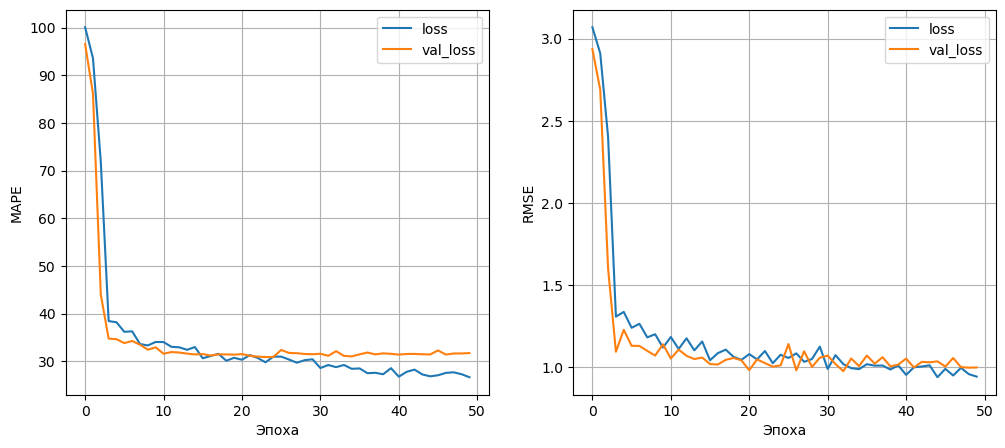

In [96]:
plot_loss(history.history)

In [97]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 1ms/step - loss: 32.1326 - root_mean_squared_error: 1.0865


[32.132572174072266, 1.0865228176116943]

In [98]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

10/10 [==============================] - 0s 892us/step


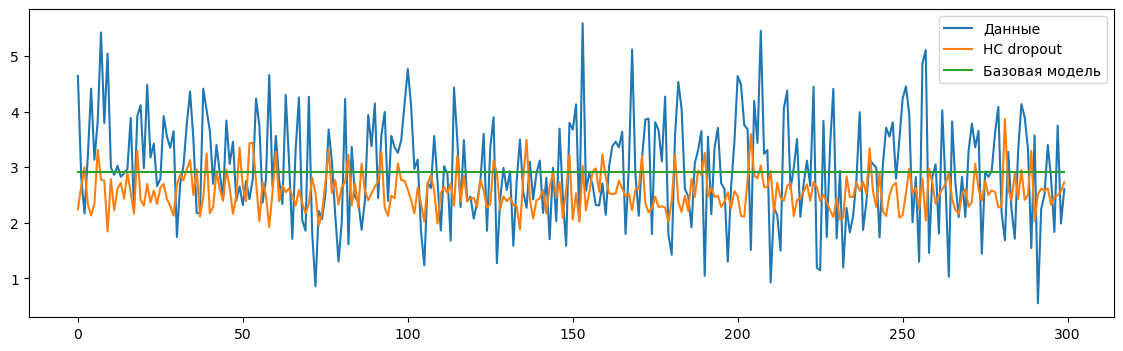

In [99]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='НС dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [100]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('НС переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('НС с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('НС dropout', y3_test, y3_pred_keras4))
compare3_2

C:\Users\lawye\AppData\Local\Temp\ipykernel_17376\400460330.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('НС переобученная', y3_test, y3_pred_keras2))
C:\Users\lawye\AppData\Local\Temp\ipykernel_17376\400460330.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('НС с ранней остановкой', y3_test, y3_pred_keras3))
C:\Users\lawye\AppData\Local\Temp\ipykernel_17376\400460330.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('НС dropout', y3_test, y3_pred_keras4))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor         -0.003309 -0.935162 -0.757702 -0.317726  -2.671554
НС переобученная       -0.482782 -1.136863 -0.929539 -0.363174  -3.122613
НС с ранней остановкой -0.394553 -1.102521 -0.888734 -0.312400  -3.356373
НС dropout             -0.354375 -1.086523 -0.867057 -0.321326  -3.201978

# Оценка точности модели

In [101]:
## Модель для модуля упругости при растяжении
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=4096, splitter='random')

In [102]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.007111 -3.220519 -2.589697 -0.035306   
Модуль упругости, тестовый      -0.033680 -2.859995 -2.265207 -0.030879   

                                 max_error  
Модуль упругости, тренировочный  -9.278179  
Модуль упругости, тестовый       -9.434457

In [103]:
## Модель для прочности при растяжении
best_model2

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=4096, splitter='random')

In [104]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.004270 -495.419634 -390.661195   
Прочность при растяжении, тестовый      -0.020139 -458.617808 -357.596120   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный -0.174210 -1406.626283  
Прочность при растяжении, тестовый      -0.148075 -1281.707872

In [105]:
## Модель для соотношения матрица-наполнитель
model3_3

In [106]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 1000us/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.247725 -1.001722 -0.771245   
Соотношение матрица-наполнитель, тестовый      -0.394553 -1.102521 -0.888734   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный -0.281196  -3.064882  
Соотношение матрица-наполнитель, тестовый      -0.312400  -3.356373

# Разработка приложения

In [107]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [108]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [109]:
save_object_with_pickle(model3_1, 'model3_1')

In [110]:
model3_2.save(models_path + '/model3_2/')

INFO:tensorflow:Assets written to: C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish//model3_2/assets


INFO:tensorflow:Assets written to: C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish//model3_2/assets


In [111]:
model3_3.save(models_path + '/model3_3/')

INFO:tensorflow:Assets written to: C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish//model3_3/assets


INFO:tensorflow:Assets written to: C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish//model3_3/assets


In [112]:
model3_4.save(models_path + '/model3_4/')

INFO:tensorflow:Assets written to: C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish//model3_4/assets


INFO:tensorflow:Assets written to: C:/Users/lawye/OneDrive/Desktop/Howmuchisthefish//model3_4/assets


In [113]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [114]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [115]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [116]:
# Примеры для тестирования модели в приложении для задач 1 и 2

In [117]:
# Вход
x1.iloc[18, :].values.astype(str)

array(['1.59817351598173', '1920.0', '456.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '57.0'], dtype='<U32')

In [118]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[18], :])
best_model1.predict(sample_x)

array([73.24759433])

In [119]:
# Вход
x2.iloc[18, :].values.astype(str)

array(['1.59817351598173', '1920.0', '456.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '57.0'], dtype='<U32')

In [120]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[18], :])
best_model2.predict(sample_x)

array([2443.4828883])

In [121]:
# Пример для тестирования модели в приложении для задачи 3
# Вход
x3.iloc[18, :].values.astype(str)

array(['1920.0', '456.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '57.0'], dtype='<U32')

In [122]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[18], :])
model3_1.predict(sample_x)

array([2.44162858])

In [123]:
save_object_with_pickle(best_model1, 'model1_best')
save_object_with_pickle(best_model2, 'model2_best')